In [46]:
from pathlib import Path

In [47]:
mnist_url = \
'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
data_dir = Path('data')
data_dir.mkdir(exist_ok=True)
path_gz = data_dir/'mnist.pkl.gz'

In [48]:
from urllib.request import urlretrieve
if not path_gz.exists():
    urlretrieve(mnist_url, path_gz)

In [49]:
import pickle, gzip
with gzip.open(path_gz, 'rb') as f:
    data = pickle.load(f, encoding='latin-1')

In [50]:
((x_train, y_train), (x_valid, y_valid), _) = data

In [51]:
x_train.shape,y_train.shape

((50000, 784), (50000,))

In [7]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [8]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz]

In [9]:
t = list(chunks(vals, 5))
t

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

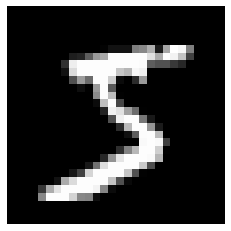

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));
plt.axis('off');

In [17]:
iter1 = iter(vals)

In [12]:
from itertools import islice

In [13]:
list(islice(iter1, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [14]:
list(islice(iter1, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [15]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

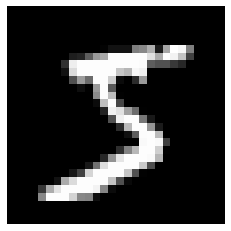

In [16]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))
plt.imshow(img);
plt.axis('off');

In [24]:
img[25][25]

0.0

In [25]:
class Matrix:
    def __init__(self, xs):
        self.xs = xs
    
    def __getitem__(self, idx):
        return self.xs[idx[0]][idx[1]]

In [27]:
m = Matrix(img)
m[25, 25]

0.0

In [53]:
import torch
from torch import tensor

In [55]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape, x_valid.shape

(torch.Size([50000, 784]), torch.Size([10000, 784]))

In [56]:
x_train.type()

'torch.FloatTensor'

In [57]:
x_train.shape

torch.Size([50000, 784])

In [59]:
imgs = x_train.reshape(-1, 28, 28)
imgs.shape

torch.Size([50000, 28, 28])

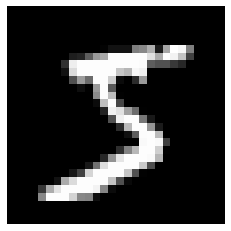

In [61]:
plt.imshow(imgs[0]);
plt.axis('off');

In [62]:
imgs[0,20,15]

tensor(0.9883)

In [76]:
torch.manual_seed(1);
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [78]:
m1 = x_valid[:5]
m2 = weights

In [79]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [80]:
ar,ac = m1.shape
br,bc = m2.shape

In [89]:
t1 = torch.zeros(ar, bc)

In [90]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i,j] += m1[i, k] * m2[k, j]

In [91]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [87]:
def matmul(m1, m2):
    ar,ac = m1.shape
    br,bc = m2.shape
    t1 = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(br):
                t1[i,j] += m1[i,k]*m2[k,j]
    return t1

In [94]:
t1 = matmul(m1, m2)

In [107]:
%time _ = matmul(m1, m2)

CPU times: user 689 ms, sys: 4.37 ms, total: 693 ms
Wall time: 692 ms


In [93]:
ar*bc*br

39200

In [102]:
def matmul2(m1, m2):
    ar,ac = m1.shape
    br,bc = m2.shape
    t1 = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            t1[i, j] = m1[i,:].dot(m2[:,j])
    return t1

In [103]:
t2 = matmul2(m1, m2)

In [114]:
%time _ = matmul2(m1, m2)

CPU times: user 6.31 ms, sys: 3.39 ms, total: 9.7 ms
Wall time: 6.91 ms


In [115]:
%timeit -n 50 _= matmul2(m1, m2)

845 µs ± 302 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [116]:
torch.allclose(t1, t2)

True

In [117]:
a = torch.tensor([10,-4.,6])
a

tensor([10., -4.,  6.])

In [118]:
a > 0

tensor([ True, False,  True])

In [119]:
m = torch.tensor([
    [5., 4, 2],
    [5., 4, 2],
    [5., 4, 2],
])
m.shape

torch.Size([3, 3])

In [121]:
c = torch.tensor([1, 4, 5])
c.shape

torch.Size([3])

In [122]:
m*c

tensor([[ 5., 16., 10.],
        [ 5., 16., 10.],
        [ 5., 16., 10.]])

In [123]:
m+c

tensor([[6., 8., 7.],
        [6., 8., 7.],
        [6., 8., 7.]])

In [124]:
t = c.expand_as(m)
t

tensor([[1, 4, 5],
        [1, 4, 5],
        [1, 4, 5]])

In [127]:
t.storage()

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_42071/1911556638.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t.storage()


 1
 4
 5
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [130]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [131]:
m.stride(), m.shape

((3, 1), torch.Size([3, 3]))

In [133]:
c, c.shape

(tensor([1, 4, 5]), torch.Size([3]))

In [149]:
c.unsqueeze(0).shape, c[None,:].shape

(torch.Size([1, 3]), torch.Size([1, 3]))

In [159]:
m.unsqueeze(2).shape, m[:,:,None].shape

(torch.Size([3, 3, 1]), torch.Size([3, 3, 1]))

In [163]:
torch.allclose(m.unsqueeze(2), m[:,:,None])

True

In [145]:
m.unsqueeze(1)

tensor([[[5., 4., 2.]],

        [[5., 4., 2.]],

        [[5., 4., 2.]]])

In [164]:
m.shape

torch.Size([3, 3])

In [173]:
c[None,:].shape, c[None,:].expand_as(m).shape

(torch.Size([1, 3]), torch.Size([3, 3]))

In [174]:
torch.allclose(c[None,:].expand_as(m), c[:,None].expand_as(m))

False

In [178]:
c[None,:].shape

torch.Size([1, 3])

In [177]:
c[None,:].expand_as(m)

tensor([[1, 4, 5],
        [1, 4, 5],
        [1, 4, 5]])

In [181]:
c[:,None].expand_as(m)

tensor([[1, 1, 1],
        [4, 4, 4],
        [5, 5, 5]])

In [183]:
c[None,:].shape,c[:,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [184]:
c[None,:]*c[:,None]

tensor([[ 1,  4,  5],
        [ 4, 16, 20],
        [ 5, 20, 25]])

In [192]:
t = torch.tensor([
    [1, 3, 4],
    [5., 5, 7],
    [5., 5, 7],
])
t.shape

torch.Size([3, 3])

In [193]:
k = torch.tensor([2, 4])
k.shape

torch.Size([2])

In [196]:
k[:,None].shape

torch.Size([2, 1])

In [194]:
t*k[:,None]

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [191]:
k[:,None].shape

torch.Size([2, 1])

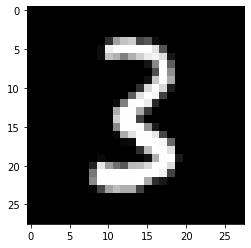

In [202]:
plt.imshow(m1[0].reshape(28, 28));

In [206]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [209]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [210]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [216]:
def matmul3(m1, m2):
    ar,bc = m1.shape
    br,bc = m2.shape
    t = torch.zeros(ar,bc)
    for i in range(ar):
        t[i] = (m1[i,:,None]*m2).sum(dim=0)
    return t

In [222]:
t3 = matmul3(m1,m2)

In [223]:
%time _ = matmul3(m1, m2)

CPU times: user 2.6 ms, sys: 1.06 ms, total: 3.66 ms
Wall time: 2.95 ms


In [224]:
torch.allclose(t3, t2)

True

In [238]:
%timeit -n 50 _= matmul3(m1, m2)

180 µs ± 96.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [230]:
%timeit -n 50 _= matmul2(m1, m2)

822 µs ± 223 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [232]:
%timeit -n 5 _= matmul(m1, m2)

645 ms ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [233]:
broadcast_speed = 242e-6
dot_product_speed = 822e-6
naive_mutl_speed = 645e-3

In [234]:
dot_product_speed/broadcast_speed

3.396694214876033

In [235]:
naive_mutl_speed/broadcast_speed

2665.289256198347

In [239]:
%timeit -n 50 _= torch.matmul(m1, m2)

The slowest run took 49.02 times longer than the fastest. This could mean that an intermediate result is being cached.
65.1 µs ± 139 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
